In [593]:
import requests
import numpy as np
import pandas as pd

#Read Data and EDA

In [594]:
final = pd.DataFrame()

#Read file 1.csv to 24.csv
for i in range(1,24):
  string = str(i) + '.csv' 
  df = pd.read_csv(string)
  final = final.append(df, ignore_index = True) 



#final['Education Required'].loc[(final['Education Required'] == 's degree')|(final['Education Required'] == 'bachelors degree')] = 'bachelor degree'
final = final.iloc[:,1:]
final = final.replace('None',np.nan)


final['Minimum Experience Required'] = final['Minimum Experience Required'] .replace(99,np.nan)
final = final.replace('none',np.nan)
final = final.drop_duplicates()
display(final)

,title,company,salary,link,description,location,Minimum Experience Required,Education Required
0,TABLEAU DEVELOPER (SOPHI),The Globe and Mail,NaN,https://ca.indeed.com/viewjob?jk=fc1458755f9a5...,"['data analysis', 'workings', 'work', 'analyti...","Toronto, ON",3.0,bachelors degree
1,securities analyst,"DeepR Analytics, Inc.",40.87,https://ca.indeed.com/viewjob?jk=76f195c0c030f...,"['investment', 'invest', 'work', 'inform', 'in...","Toronto, ON",NaN,NaN
2,"Analyst, Compensation & Classification",Vancouver Island Health Authority,NaN,https://ca.indeed.com/viewjob?jk=d3a1d8b3c545e...,"['skills', 'classification', 'resources', 'res...","Victoria, BC",2.0,NaN
3,"Analyst, Data Management and Anonymization Centre",Desjardins,NaN,https://ca.indeed.com/viewjob?jk=ce7f05f4ae1e9...,"['management', 'data', 'teams', 'team', 'requi...","Montréal, QC",NaN,bachelors degree
4,Business Analyst \ Business Data Analyst ( Ban...,Globewin Consulting Incorporation,NaN,https://ca.indeed.com/viewjob?jk=71f97df17cb69...,"['data', 'requirements', 'required', 'requir',...","Oakville, ON",3.0,secondary degree
...,...,...,...,...,...,...,...,...
6664,Business Analyst - Business Intelligence & Ana...,Affinity Staffing,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Winnipeg, MB",NaN,NaN
6665,Lead Business Analyst - 299191,Procom,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Burnaby, BC",NaN,NaN
6666,Business Analyst - Digital Health,Affinity Staffing,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,NaN
6667,Salesforce Business Systems Analyst,Affinity Staffing,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,NaN


In [595]:
display(final.describe())
display(final['location'].unique())

,Minimum Experience Required
count,430.000000
mean,3.113953
std,1.980921
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


array(['Toronto, ON', 'Victoria, BC', 'Montréal, QC', 'Oakville, ON',
       'Brantford, ON', 'Thornhill, ON', 'Mississauga, ON',
       'Richmond, BC', 'Remote', 'Calgary, AB', 'Ontario',
       'Longueuil, QC', 'Scarborough, ON', 'Humboldt, SK',
       'St. Anthony, NL', 'Saint-Laurent, QC', 'Dartmouth, NS',
       'Vancouver, BC', 'Canada', 'Ottawa, ON', 'Brampton, ON',
       'Port Coquitlam, BC', 'Markham, ON', 'New Brunswick',
       'Concord, ON', 'Halifax, NS', 'Greater Montreal Area, QC',
       'Wainwright, AB', 'Kelowna, BC', 'Boucherville, QC',
       'Winnipeg, MB', 'Alberta', 'Dieppe, NB', 'British Columbia',
       'Burnaby, BC', 'Regina, SK', 'Saskatchewan', 'Surrey, BC',
       'Windsor, ON', 'London, ON', 'Edmonton, AB', "St. John's, NL",
       'York, ON', 'Etobicoke, ON', 'Stoney Creek, ON', 'Woodbridge, ON',
       'Kirkland, QC', 'Moncton, NB', 'Waterloo, ON', 'Stellarton, NS',
       'Quebec City, QC', 'Guelph, ON', 'Verdun, QC',
       'St. Catharines, ON', 'New

In [596]:
labels = final['Education Required'].unique() 

#secondary degree
#Bachelor degree
#graduate degree, #master degree
#postgraduate degree
display(labels)

array(['bachelors degree', nan, 'secondary degree', 'bachelor degree',
       'higher degree', 'some degree', 'university degree',
       'superior degree high degree', 'undergraduate degree',
       'masters degree', 'engineering degree', 'a degree',
       'college degree', '2 degree', 'or degree', 'business degree',
       'high degree', 'secondary degree masters degree',
       'university degree a degree', 'graduate degree', 'varying degree',
       'bachelors degree masters degree',
       'associates degree bachelors degree', 'education degree',
       'year degree', 'of degree', 'science degree', 'commerce degree',
       'ms degree', 'bs degree', 'tertiary degree', 'advanced degree',
       'level degree', 'baccalaureate degree masters degree',
       'a degree masters degree', 'to degree',
       'undergraduate degree graduate degree', 'quantitative degree',
       'year degree formal degree', 'professional degree'], dtype=object)

In [597]:
def summerize_degree(dgr):
  if dgr is np.nan:
    return "undefine"
  if ("college" in dgr) | ("secondary" in dgr):
    return "secondary"
  if  ("doctor" in dgr)| ("post" in dgr):
    return "postgraduate"
  if ("master" in dgr) | ("graduate"  in dgr):
    return "graduate"
  if "high" in dgr:
    return "graduate"

  if "bachelor" in dgr:
    return "university"

  if ("college" in dgr) | ("secondary" in dgr):
    return "secondary"

  else: return "university"

final['Education Required'] = final['Education Required'].apply(summerize_degree)

In [598]:
labels = final['Education Required'].unique() 
display(labels)

array(['university', 'undefine', 'secondary', 'graduate'], dtype=object)

In [599]:
temp = final.loc[:,['salary','location','Minimum Experience Required']]
visualizable_feature_names = temp.columns #

labels = final['Education Required'].unique() 

import plotly.graph_objects as go

fig_hist = []
for i, feature_name in enumerate(visualizable_feature_names):
    fig_hist.append(go.Figure())
    for label in labels:
        fig_hist[i].add_trace(go.Histogram(x= final[final['Education Required']==label][feature_name], name=label))
    fig_hist[i].update_layout(height=400, width=800, title_text=feature_name)
    fig_hist[i].update_layout(barmode='overlay')
    fig_hist[i].update_traces(opacity=0.5)
    fig_hist[i].show()

In [600]:
final['Education Required'].value_counts()

undefine      4369
university     268
graduate        90
secondary       29
Name: Education Required, dtype: int64

In [601]:
final['salary'].isnull().sum()

4438

In [602]:
df = pd.DataFrame({'number': [28,216, 77,1]}, index=['secondary', 'university','graduate','post graduate'])

In [603]:
final.loc[55,'Minimum Experience Required'] = np.nan
#it counts company history years into mini experience required
#replace it to NaN
display(final[final['Minimum Experience Required']>20])

,title,company,salary,link,description,location,Minimum Experience Required,Education Required


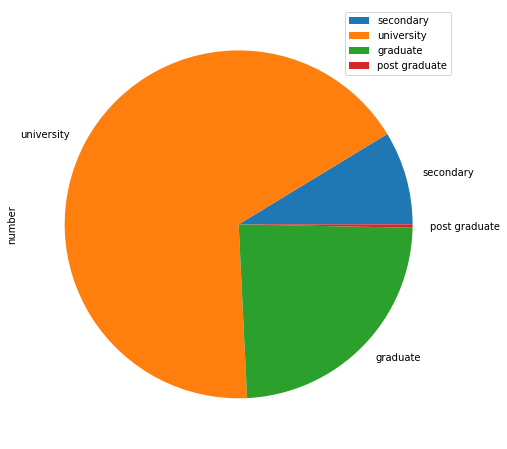

In [604]:
plot = df.plot.pie(subplots=True, figsize=(11, 8))

In [605]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

fi = final
fi["description"] = fi["description"].apply(eval)

fi_dict = {}
for i in fi["description"]:
    for j in i:
        if j not in fi_dict:
            fi_dict[j] = 1
        else:
            fi_dict[j] += 1

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(fi["description"]).value_counts().head(10)


business        308
data            288
experience      187
work            177
management      161
working         136
team            131
requirements    125
development     120
develop         113
dtype: int64

2- > Intermediate

3 -> Senior/ Lead

1 -> Junior /New 

0 -> else

In [606]:
def title_trans(tit):
  if "intermediate" in tit.lower():
    return 2
  if ("senior" in tit.lower()) | ("lead" in tit.lower()):
    return 3
  if "junior" in tit.lower():
    return 1
  else: return 0

final['title'] = final['title'].astype(str).apply(title_trans)

In [607]:
display(final)

,title,company,salary,link,description,location,Minimum Experience Required,Education Required
0,0,The Globe and Mail,NaN,https://ca.indeed.com/viewjob?jk=fc1458755f9a5...,"[data analysis, workings, work, analytical, an...","Toronto, ON",3.0,university
1,0,"DeepR Analytics, Inc.",40.87,https://ca.indeed.com/viewjob?jk=76f195c0c030f...,"[investment, invest, work, inform, information...","Toronto, ON",NaN,undefine
2,0,Vancouver Island Health Authority,NaN,https://ca.indeed.com/viewjob?jk=d3a1d8b3c545e...,"[skills, classification, resources, resource, ...","Victoria, BC",2.0,undefine
3,0,Desjardins,NaN,https://ca.indeed.com/viewjob?jk=ce7f05f4ae1e9...,"[management, data, teams, team, requirements, ...","Montréal, QC",NaN,university
4,0,Globewin Consulting Incorporation,NaN,https://ca.indeed.com/viewjob?jk=71f97df17cb69...,"[data, requirements, required, requir, require...","Oakville, ON",3.0,secondary
...,...,...,...,...,...,...,...,...
6664,0,Affinity Staffing,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Winnipeg, MB",NaN,undefine
6665,3,Procom,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Burnaby, BC",NaN,undefine
6666,0,Affinity Staffing,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,undefine
6667,0,Affinity Staffing,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,undefine


#Data Cleaned
This time, only consider dataset without salary NaN
1.   Encoding all data 
2.   Remove Unexpected Data



In [608]:
cleaned = final.loc[:,['location','Minimum Experience Required','Education Required','company','salary','title']]
cleaned = cleaned.dropna(subset=['salary'])
display(cleaned)

,location,Minimum Experience Required,Education Required,company,salary,title
1,"Toronto, ON",NaN,undefine,"DeepR Analytics, Inc.",40.87,0
6,"Thornhill, ON",NaN,undefine,EU Health and Innovations Inc.,38.94,0
8,"Richmond, BC",NaN,undefine,CENTURION HARDWOOD FLOORS LTD,31.5,0
17,"Richmond, BC",NaN,undefine,FLASH PAY TECHNOLOGY INC.,32.0,0
20,"Montréal, QC",5.0,university,McGill University,53.31,3
...,...,...,...,...,...,...
6566,"Calgary, AB",NaN,undefine,Robert Half,43.27,0
6581,"Calgary, AB",NaN,undefine,Robert Half,43.27,0
6596,"Toronto, ON",NaN,undefine,Aerotek,35.0,0
6612,"Toronto, ON",NaN,undefine,Aerotek,35.0,0


In [609]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#predictions_test = le.inverse_transform(prediction_test)

In [610]:
display(cleaned['location'].unique())

array(['Toronto, ON', 'Thornhill, ON', 'Richmond, BC', 'Montréal, QC',
       'St. Anthony, NL', 'Ottawa, ON', 'New Brunswick', 'Kelowna, BC',
       'Mississauga, ON', 'Burnaby, BC', 'Calgary, AB', 'Oakville, ON',
       'Vancouver, BC', 'York, ON', 'Etobicoke, ON', 'Edmonton, AB',
       'Surrey, BC', 'Winnipeg, MB', 'Ajax, ON', 'North York, ON',
       'West Vancouver, BC', 'Regina, SK', 'Midland, ON', 'Barrie, ON',
       'Markham, ON', 'Strathroy, ON', 'Unionville, ON', 'Iqaluit, NU',
       'Lethbridge, AB', 'Canada', 'Aldouane, NB', 'Sioux Lookout, ON',
       'Woodbridge, ON', 'Brampton, ON', 'Haines Junction, YT',
       'Milton, ON', 'Sydney, NS', 'St. Catharines, ON', 'Concord, ON',
       "St. John's, NL", 'Coquitlam, BC', 'Saskatoon, SK', 'Saskatchewan',
       'Vaughan, ON', 'Hiawatha, ON', 'Vaudreuil-Dorion, QC',
       'Burlington, ON'], dtype=object)

In [611]:
def loc_ass(loc):
  if loc == 'Remote':
    return 'Remote'
  if loc == 'New Brunswick':
    return ' NB'
  if loc == 'Saskatchewan':
    return ' SK'
  else:
    return loc.split(',').pop()

cleaned['location'] = cleaned['location'].apply(loc_ass)


display(cleaned['location'].unique())


array([' ON', ' BC', ' QC', ' NL', ' NB', ' AB', ' MB', ' SK', ' NU',
       'Canada', ' YT', ' NS'], dtype=object)

In [612]:
data = pd.DataFrame()
data['companyName'] = cleaned['company']
data['locationName'] = cleaned['location']
data['location'] = le.fit_transform(cleaned['location'])
data['company'] = le.fit_transform(cleaned['company'])


1.   secondary
2.   university
3.   graduate
4.   postgraduate
5.   Undefine

In [613]:
data['Education Required'] =le.fit_transform(cleaned['Education Required'])


In [614]:
data['Minimum Experience Required'] =le.fit_transform(cleaned['Minimum Experience Required'])
data['title'] = le.fit_transform(cleaned['title'])
data['Minimum Experience Required'] = data['Minimum Experience Required'].fillna(0)
data['salary'] = cleaned['salary'].to_numpy().astype(float)
data= data[data['salary'] < 99]

display(data)

,companyName,locationName,location,company,Education Required,Minimum Experience Required,title,salary
1,"DeepR Analytics, Inc.",ON,7,24,2,37,0,40.87
6,EU Health and Innovations Inc.,ON,7,32,2,202,0,38.94
8,CENTURION HARDWOOD FLOORS LTD,BC,1,10,2,201,0,31.50
17,FLASH PAY TECHNOLOGY INC.,BC,1,35,2,200,0,32.00
20,McGill University,QC,8,60,3,4,2,53.31
...,...,...,...,...,...,...,...,...
6566,Robert Half,AB,0,87,2,95,0,43.27
6581,Robert Half,AB,0,87,2,94,0,43.27
6596,Aerotek,ON,7,2,2,93,0,35.00
6612,Aerotek,ON,7,2,2,250,0,35.00


,location,company,Education Required,Minimum Experience Required,title,salary
location,1.000000,-0.426078,-0.121583,0.125809,0.000618,-0.095150
company,-0.426078,1.000000,-0.051628,-0.123691,0.160642,-0.178882
Education Required,-0.121583,-0.051628,1.000000,-0.042018,0.042912,-0.010282
Minimum Experience Required,0.125809,-0.123691,-0.042018,1.000000,0.004136,0.037092
title,0.000618,0.160642,0.042912,0.004136,1.000000,-0.263833
salary,-0.095150,-0.178882,-0.010282,0.037092,-0.263833,1.000000


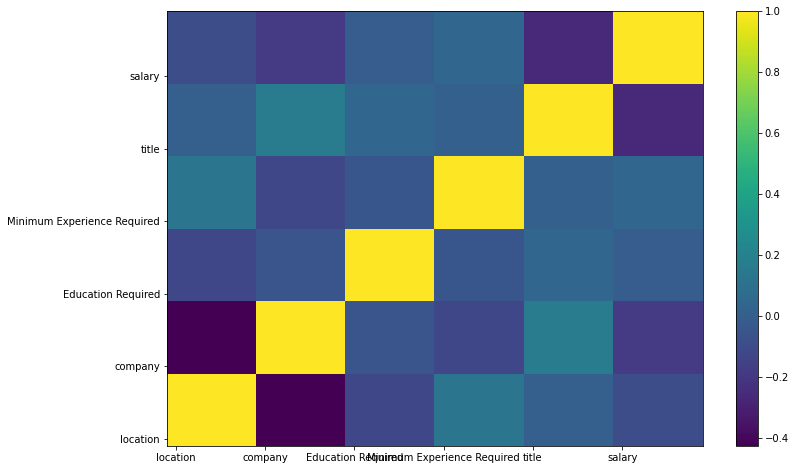

In [615]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
corr = data.corr()
display(corr)
c = plt.pcolor(corr)
plt.yticks(np.arange(0.1, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.1, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

#Data Split and Validation



*   feature engineer
*   algorithum selections



In [616]:
from sklearn.model_selection import train_test_split
#data = data.dropna(subset=['Minimum Experience Required'])
data = data.drop(columns=["Education Required"])



In [617]:
display(data['location'].unique(),data['company'].unique())
data = data.drop(columns=["Minimum Experience Required"])

array([ 7,  1,  8,  4,  3,  0,  2,  9,  6, 11, 10,  5])

array([ 24,  32,  10,  35,  60,  53,  96,  15, 111,  72,  70,  99,   2,
        44,  77,  14, 104,   5,  68,  39,  29, 101,  79,  19,  47,   9,
        58,  94,  54,  16,  59,  67,  18,  38,  98,  45, 113, 108,  46,
       112,  85,   8,  50,  37, 103,  76,  83,  30,  52,  17,  63,  20,
        55,  34, 114,  36,  87,  21,  31,  66,  82,  11,   4,   3,  71,
        49,  41,  27,   6,  80, 105,  48,  12,  62, 109,  65,  51,  91,
        86,  64,  57,   0, 115,  84,  42,  73,  75,  78,  69,  74,  28,
        90,  43,  89, 102,  13, 107,  23,  81,  93,  26,  97,  92,  40,
         7,  22, 100,   1,  56,  88,  33,  95, 110])

In [618]:


X = data.iloc[:,2:5].values

y = data['salary'].values
display(X.shape)


(295, 3)

In [619]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [620]:
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    ensemble.RandomForestRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    ensemble.ExtraTreesRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(type(item))
    clf = item
    clf.fit(X_train, y_train)
    print(cross_val_score(clf,X,y,cv=4)) #should be positive
    print(mean_absolute_error(y_test, clf.predict(X_test)),'\n')


<class 'sklearn.svm._classes.SVR'>
[-0.20074843 -0.0739557   0.06947441 -0.87639816]
7.348000938406233 

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>
[-4.33984596e+21 -3.70576614e+20 -1.40644862e+23 -3.32184984e+21]
8.621364666205157 

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[-0.02201749  0.51099352  0.38952009  0.15733331]
3.150082131572818 

<class 'sklearn.linear_model._bayes.BayesianRidge'>
[-0.0830186  -0.07832923  0.14501488 -1.00234692]
8.747675401441745 

<class 'sklearn.linear_model._least_angle.LassoLars'>
[-0.09632929 -0.189618   -0.00306339 -0.0196754 ]
9.665427075379078 

<class 'sklearn.linear_model._bayes.ARDRegression'>
[-0.11984863 -0.06082246  0.13208181 -0.66542994]
8.86038850207874 

<class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveRegressor'>
[-0.75670145 -4.26947812 -0.87973366 -9.46695141]
9.056703911567851 

<class 'sklearn.linear_model._theil_sen.TheilSenRegressor'>
[-0.27524646 -0.33043398 -0.10024341 -0.76

The lower value of mean_absolute_error, meaning less error.

Comparatively, Extra Regressor is the best among them

#Model Predicted Result and Implementation

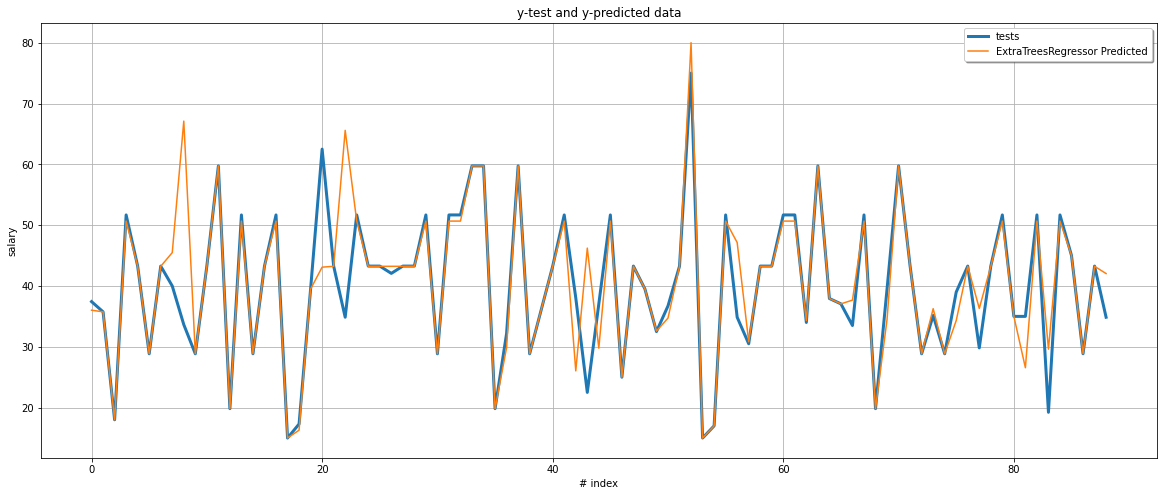

In [621]:

c2 = ensemble.ExtraTreesRegressor()
c2.fit(X_train, y_train)
x_ax = range(len(y_test))
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(x_ax, y_test, linewidth=3, label="tests")

plt.plot(x_ax, c2.predict(X_test), linewidth=1.5, label="ExtraTreesRegressor Predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('# index')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 



Low Accuracy

In [675]:
#find similar company, and set job title level and company location

#location company	title
location_list = data.iloc[:,1:3].drop_duplicates()
display(location_list['locationName'].unique())

company_list = data.iloc[:, list(range(1)) + [3]].drop_duplicates()
display(company_list['companyName'].unique())

import csv
pd.DataFrame(company_list['companyName'].unique()).to_csv('companyNameList.csv')

array([' ON', ' BC', ' QC', ' NL', ' NB', ' AB', ' MB', ' SK', ' NU',
       'Canada', ' YT', ' NS'], dtype=object)

array(['DeepR Analytics, Inc.', 'EU Health and Innovations Inc.',
       'CENTURION HARDWOOD FLOORS LTD', 'FLASH PAY TECHNOLOGY INC.',
       'McGill University', 'Labrador-Grenfell Health',
       'Statistics Canada', 'City of Toronto', 'WeyMedia Inc.',
       'Okanagan College', 'Nulogx Inc.', 'StorageVault Canada Inc.',
       'Aerotek', 'Harvest Operations Corp.', 'Policy Me',
       'Centre for Addiction and Mental Health', 'Town of Oakville',
       'AutoMetrics Manufacturing Technologies Inc', 'Nimonik Inc',
       'Foilcon', 'EN3 Solutions Ltd.', 'TWI Foods Inc.', 'PressReader',
       'Compass Group Canada', 'Imperial Tobacco Canada',
       'British Columbia Institute of Technology (BCIT)',
       'MSi Corp (Bell Canada)', 'Solvezit', 'Lakhe Wale Jewellers Ltd.',
       'Cleo Fashions Inc.', 'MakeWay', 'Next Step Trading Inc',
       'Cloud IT!', 'First Nations Education Steering Committee (FNESC)',
       'Sterling-Turner', 'ICE CURRENCY SERVICES', 'York University',
       

Giving the list above, the user can type in their company info to find out what the suggested salary given. 

In [672]:
location_provice = ' ' + input("Enter your province (ex.ON): ").upper() 
while location_provice.upper() not in location_list['locationName'].unique():
  print('Entered Wrong. Please Enter Agagin.')
  location_provice = ' ' + input("Enter your province (ex.ON): ").upper() 

SimilarCompanyName = input("Enter the similar company Name on list (right copy from the list): ") 
while SimilarCompanyName not in company_list['companyName'].unique():
  print('Company Not in the list. Please try another one.')
  SimilarCompanyName = input("Enter the similar company Name on list (right copy from the list): ")

levelJob = input("Enter the level of the job (0 to 3): ")
while levelJob not in ['0','1','2','3']:
  print('Entered Wrong. Please Enter Agagin.')
  levelJob = input("Enter the level of the job (0 to 3): ") 

display(c2.predict(np.array([location_list[location_list['locationName']  == location_provice]['location'].values[0].astype(int),
                             company_list[company_list['companyName']  == SimilarCompanyName]['company'].values[0].astype(int), levelJob]).reshape(1,3)))

Enter your province (ex.ON): ON
Enter the similar company Name on list (right copy from the list): DXC
Enter the level of the job (0 to 3): 2


array([24.9041])